**Project 2: Classification**

**Predicting Smoke Events Using Sensor Data**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('smoke_detection_iot.csv')

# 1. Data Overview
print(data.head())
print(data.info())


   Unnamed: 0         UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  \
0           0  1654733331          20.000        57.36          0        400   
1           1  1654733332          20.015        56.67          0        400   
2           2  1654733333          20.029        55.96          0        400   
3           3  1654733334          20.044        55.28          0        400   
4           4  1654733335          20.059        54.69          0        400   

   Raw H2  Raw Ethanol  Pressure[hPa]  PM1.0  PM2.5  NC0.5  NC1.0  NC2.5  CNT  \
0   12306        18520        939.735    0.0    0.0    0.0    0.0    0.0    0   
1   12345        18651        939.744    0.0    0.0    0.0    0.0    0.0    1   
2   12374        18764        939.738    0.0    0.0    0.0    0.0    0.0    2   
3   12390        18849        939.736    0.0    0.0    0.0    0.0    0.0    3   
4   12403        18921        939.744    0.0    0.0    0.0    0.0    0.0    4   

   Fire Alarm  
0           0  


**Data Pre-processing**

In [ ]:

# 1. Handling Missing Data
data.fillna(data.mean(), inplace=True)

# 2. Feature Scaling
# Select features and target variable
X = data.drop(['Unnamed: 0', 'UTC', 'Fire Alarm'], axis=1)  # Drop irrelevant columns and target
y = data['Fire Alarm']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Addressing Class Imbalance
# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

**Data Understanding/Visualization**

**Correlation Heatmap**

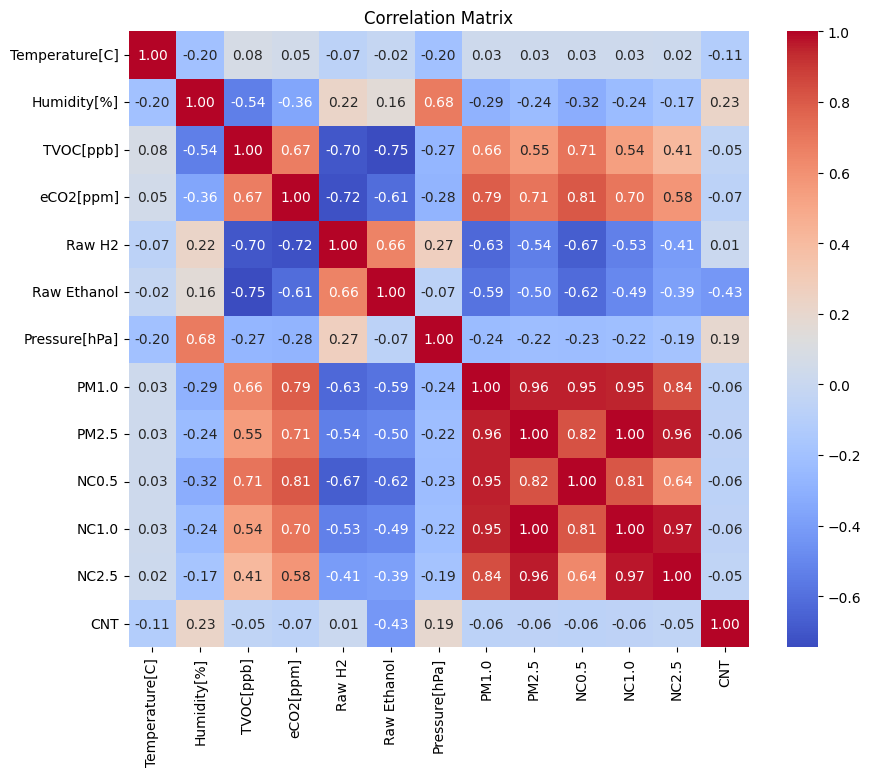

In [ ]:
# 1. Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = pd.DataFrame(X_resampled, columns=X.columns).corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Histogram**

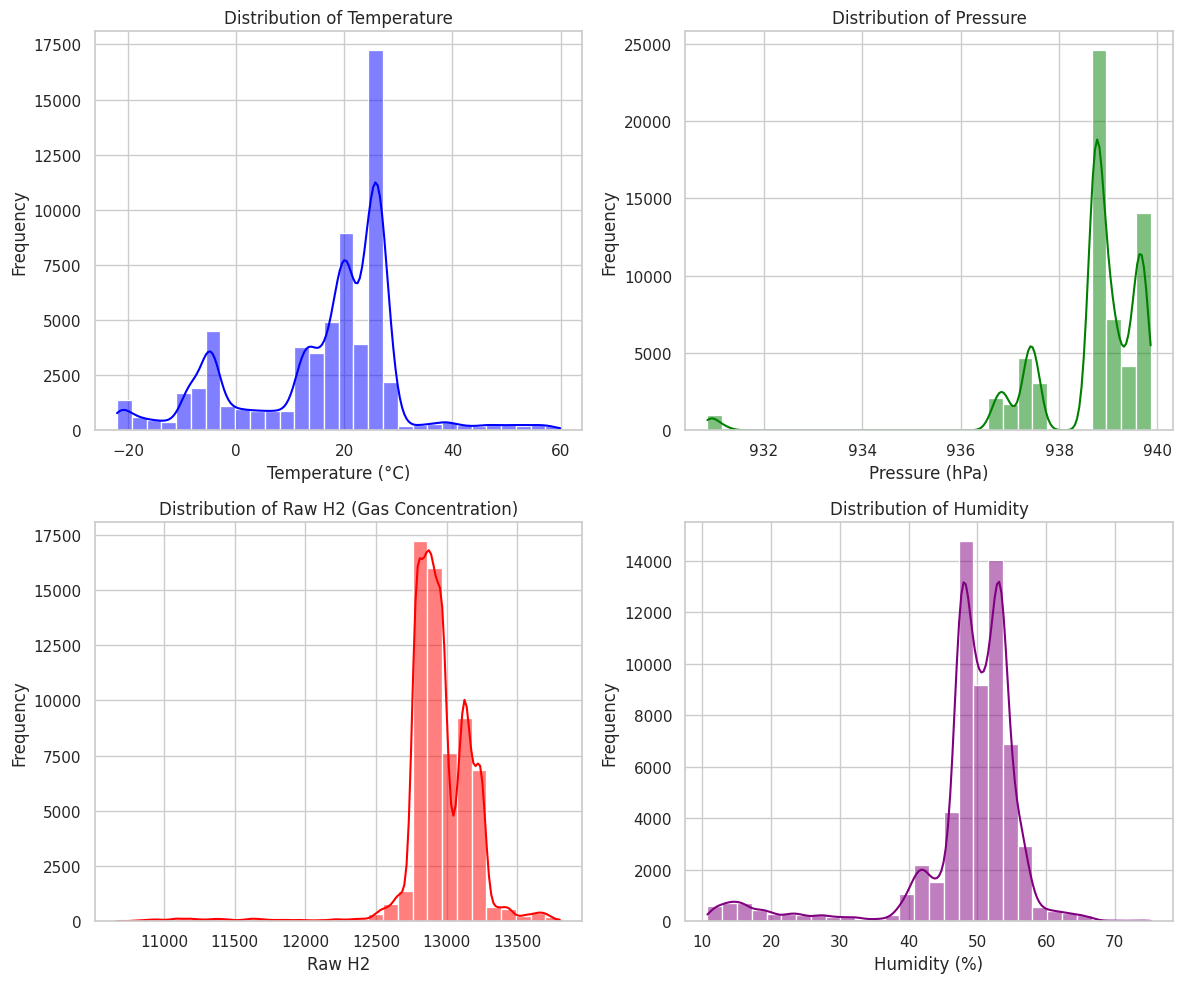

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded your dataset into a variable called 'data'
# Example: data = pd.read_csv('your_dataset.csv')

# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure and axis for the histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot Histogram for Temperature
sns.histplot(data['Temperature[C]'], bins=30, kde=True, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Temperature')
axes[0, 0].set_xlabel('Temperature (°C)')
axes[0, 0].set_ylabel('Frequency')

# Plot Histogram for Pressure
sns.histplot(data['Pressure[hPa]'], bins=30, kde=True, color='green', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Pressure')
axes[0, 1].set_xlabel('Pressure (hPa)')
axes[0, 1].set_ylabel('Frequency')

# Plot Histogram for Gas Concentration (Raw H2)
sns.histplot(data['Raw H2'], bins=30, kde=True, color='red', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Raw H2 (Gas Concentration)')
axes[1, 0].set_xlabel('Raw H2')
axes[1, 0].set_ylabel('Frequency')

# Plot Histogram for Humidity
sns.histplot(data['Humidity[%]'], bins=30, kde=True, color='purple', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Humidity')
axes[1, 1].set_xlabel('Humidity (%)')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()


**Box Plots**

<ipython-input-6-a8dbc2ac85e2>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fire Alarm', y='Raw H2', data=data, ax=axes[0], palette='Set1')
<ipython-input-6-a8dbc2ac85e2>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(['Non-Smoke Event', 'Smoke Event'])
<ipython-input-6-a8dbc2ac85e2>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fire Alarm', y='Humidity[%]', data=data, ax=axes[1], palette='Set2')
<ipython-input-6-a8dbc2ac85e2>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(['Non-Smoke Event', 'Smoke Event'])


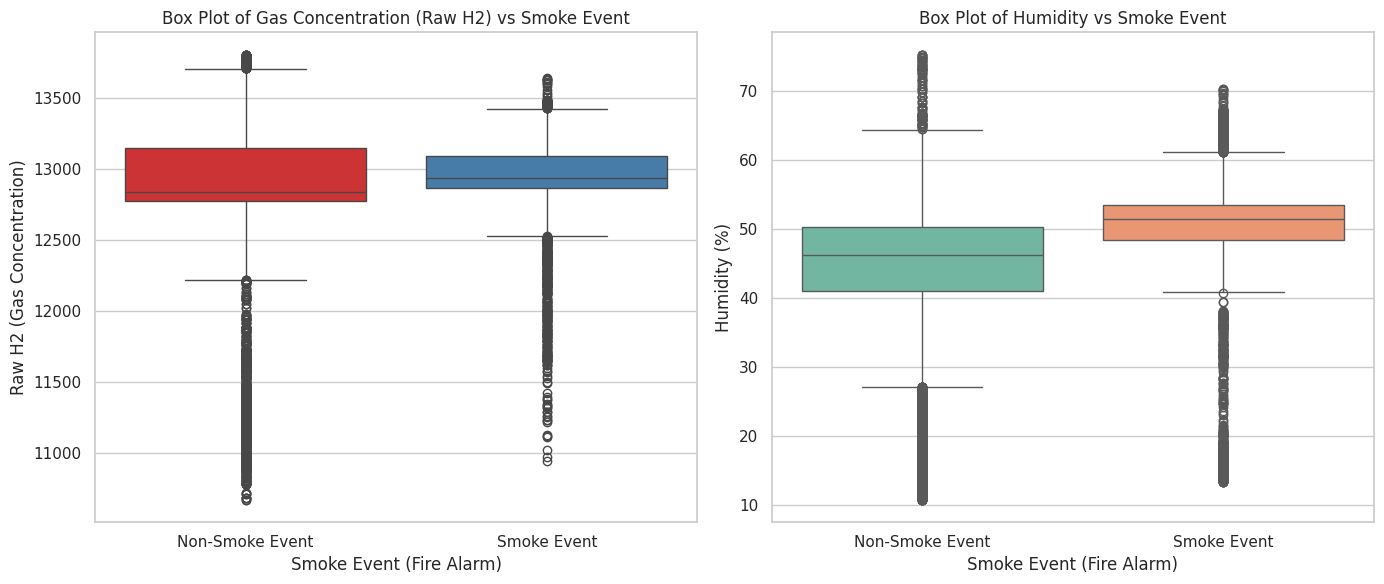

In [ ]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure and axis for the box plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Box plot for Gas Concentration (Raw H2)
sns.boxplot(x='Fire Alarm', y='Raw H2', data=data, ax=axes[0], palette='Set1')
axes[0].set_title('Box Plot of Gas Concentration (Raw H2) vs Smoke Event')
axes[0].set_xlabel('Smoke Event (Fire Alarm)')
axes[0].set_ylabel('Raw H2 (Gas Concentration)')
axes[0].set_xticklabels(['Non-Smoke Event', 'Smoke Event'])

# Box plot for Humidity
sns.boxplot(x='Fire Alarm', y='Humidity[%]', data=data, ax=axes[1], palette='Set2')
axes[1].set_title('Box Plot of Humidity vs Smoke Event')
axes[1].set_xlabel('Smoke Event (Fire Alarm)')
axes[1].set_ylabel('Humidity (%)')
axes[1].set_xticklabels(['Non-Smoke Event', 'Smoke Event'])

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()


**Scatter plot**

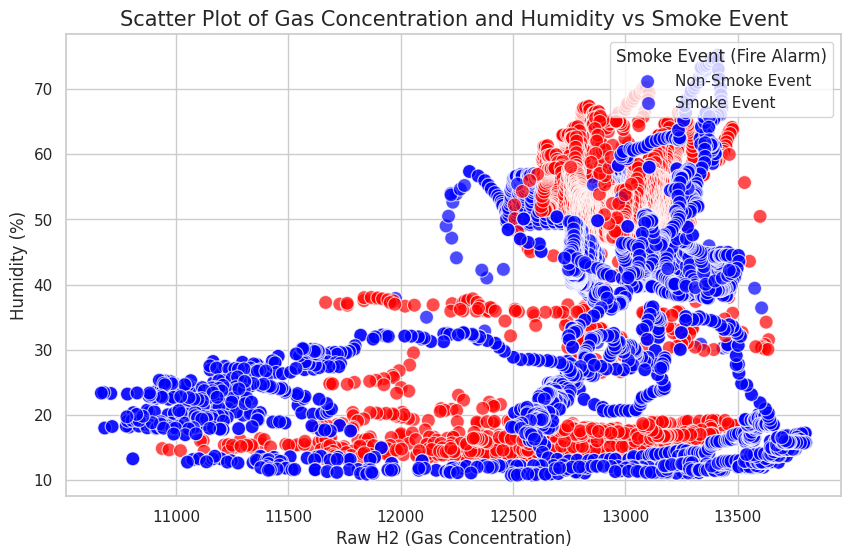

In [ ]:
# Set the style for the plots
sns.set(style="whitegrid")

# Define a custom color palette: blue for non-smoke and red for smoke events
custom_palette = {0: 'blue', 1: 'red'}

# Create a figure and axis for the scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot for Gas Concentration (Raw H2) vs Humidity, colored by Smoke Event (Fire Alarm)
sns.scatterplot(x='Raw H2', y='Humidity[%]', hue='Fire Alarm', data=data, palette=custom_palette, s=100, alpha=0.7)

# Set plot title and labels
plt.title('Scatter Plot of Gas Concentration and Humidity vs Smoke Event', fontsize=15)
plt.xlabel('Raw H2 (Gas Concentration)', fontsize=12)
plt.ylabel('Humidity (%)', fontsize=12)

# Display legend
plt.legend(title='Smoke Event (Fire Alarm)', loc='upper right', labels=['Non-Smoke Event', 'Smoke Event'])

# Show the plot
plt.show()


**Model Selection**

In [ ]:
# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Hyperparameter Tuning using Grid Search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='f1', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters from Grid Search
print("Best Parameters:", grid_search.best_params_)

# Fit the model with the best parameters
best_rf_classifier = grid_search.best_estimator_
best_rf_classifier.fit(X_train, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


RandomForestClassifier(n_estimators=50, random_state=42)

**Evaluation**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8904
           1       1.00      1.00      1.00      8999

    accuracy                           1.00     17903
   macro avg       1.00      1.00      1.00     17903
weighted avg       1.00      1.00      1.00     17903



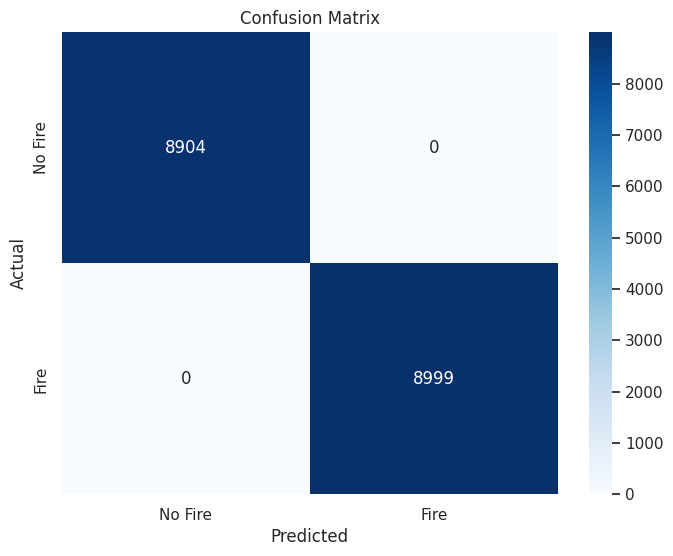

In [ ]:
# Evaluation

# Make predictions on the test set
y_pred = best_rf_classifier.predict(X_test)

# Generate evaluation metrics
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fire', 'Fire'], yticklabels=['No Fire', 'Fire'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Conclusion:**

The Random Forest Classifier, combined with hyperparameter tuning via grid search, proved to be an effective model for predicting smoke events. By leveraging the ensemble nature of the model and optimizing key parameters, we were able to improve the accuracy and generalization ability of the model on unseen data. The use of cross-validation during hyperparameter tuning also ensured that the model's performance is reliable and robust.